In [1]:
import pandas as pd
import altair as alt
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
df = pd.read_csv('data/ant_joint_locations.csv', comment='#')
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood
0,0,dalotia,0,head,73.086,193.835,1.0
1,1,dalotia,0,head,73.730,194.385,1.0
2,2,dalotia,0,head,75.673,195.182,1.0
3,3,dalotia,0,head,77.319,196.582,1.0
4,4,dalotia,0,head,78.128,197.891,1.0


In [3]:
df['x_coord (mm)'] = df['x_coord'] * 0.08 # mm / pixel
df['y_coord (mm)'] = df['y_coord'] * 0.08 
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x_coord (mm),y_coord (mm)
0,0,dalotia,0,head,73.086,193.835,1.0,5.84688,15.50680
1,1,dalotia,0,head,73.730,194.385,1.0,5.89840,15.55080
2,2,dalotia,0,head,75.673,195.182,1.0,6.05384,15.61456
3,3,dalotia,0,head,77.319,196.582,1.0,6.18552,15.72656
4,4,dalotia,0,head,78.128,197.891,1.0,6.25024,15.83128


In [4]:
# all the inds
dalotia = df['beetle_treatment'] == 'dalotia'
sceptobius = df['beetle_treatment'] == 'sceptobius'
thorax = df['bodypart'] == 'thorax'

# Boolean slicing
df_dalo_thor = df.loc[dalotia & thorax, :]
df_scepto_thor = df.loc[sceptobius & thorax, :]

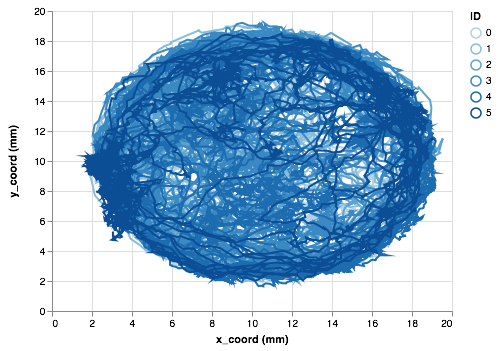

In [5]:
dalotia_thorax = alt.Chart(df_dalo_thor
    ).mark_line(
    ).encode(x='x_coord (mm)',
             y='y_coord (mm)',
             order=alt.Order('frame:Q', sort='ascending'),
             color='ID:O')

dalotia_thorax

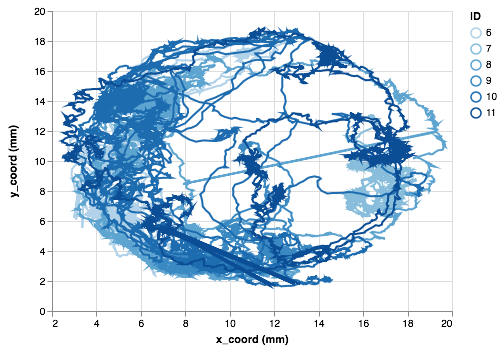

In [6]:
sceptobius_thorax = alt.Chart(df_scepto_thor
    ).mark_line(
    ).encode(x='x_coord (mm)',
             y='y_coord (mm)',
             order=alt.Order('frame:Q', sort='ascending'),
             color='ID:O')

sceptobius_thorax